# Viscoelasticity : Poynting-Thomson rheological model

In [1]:
%matplotlib inline

import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from simcoon import simmit as sim
import os
from IPython.display import HTML
dir = os.path.dirname(os.path.realpath('__file__'))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

The Poynting-Thomson constitutive law implemented in SMART+ is a rate dependent, isotropic, Zener-type linear viscoelastic model that consider thermal strains

Nine parameters are required for the thermomechanical version: 
1. The Thermoelastic Young's modulus $E_0$,
2. The Thermoelastic Poisson's ratio $\nu_0$,
3. The Thermoelastic coefficient of thermal expansion $\alpha_0$,
4. The Viscoelastic Young's modulus of Zener branch $E_1$,
5. The Viscoelastic Poisson's ratio of Zener branch $\nu_1$,
6. The Viscoelastic Bulk viscosity of Zener branch $\eta_B$
7. The Viscoelastic shear viscosity of Zener branch $\eta_s$

In 'smartplus' the viscoelastic material constitutive law is implemented using a *fast scalar updating method*. The updated stress is provided for 1D, plane stress, and generalized plane strain/3D analysis according to the forms of elastic isotropic materials.
The updated work, and internal heat production $r$ are determined with the algorithm presented in the *simmit* documentation.

As a start we should input the name of the UMAT as well as the list of parameters

In [25]:
umat_name = 'ZENER' #This is the 5 character code for the elastic-plastic subroutine
nstatev = 8 #The number of scalar variables required, only the initial temperature is stored here

E_0 = 3000
nu_0 = 0.4
alpha = 0.
E_1 = 100.
nu_1 = 0.3
eta_S = 4000.0
eta_B = eta_S/4.0


##local orientation
psi_rve = 0.
theta_rve = 0.
phi_rve = 0.
solver_type = 0
corate_type = 2

#Define the properties
props = np.array([E_0, nu_0, alpha, E_1, nu_1, eta_B, eta_S])
path_data = 'data'
path_results = 'results'

#Run the simulation
pathfile = 'path.txt'
outputfile = 'results_ZENER.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, solver_type, corate_type, path_data, path_results, pathfile, outputfile)

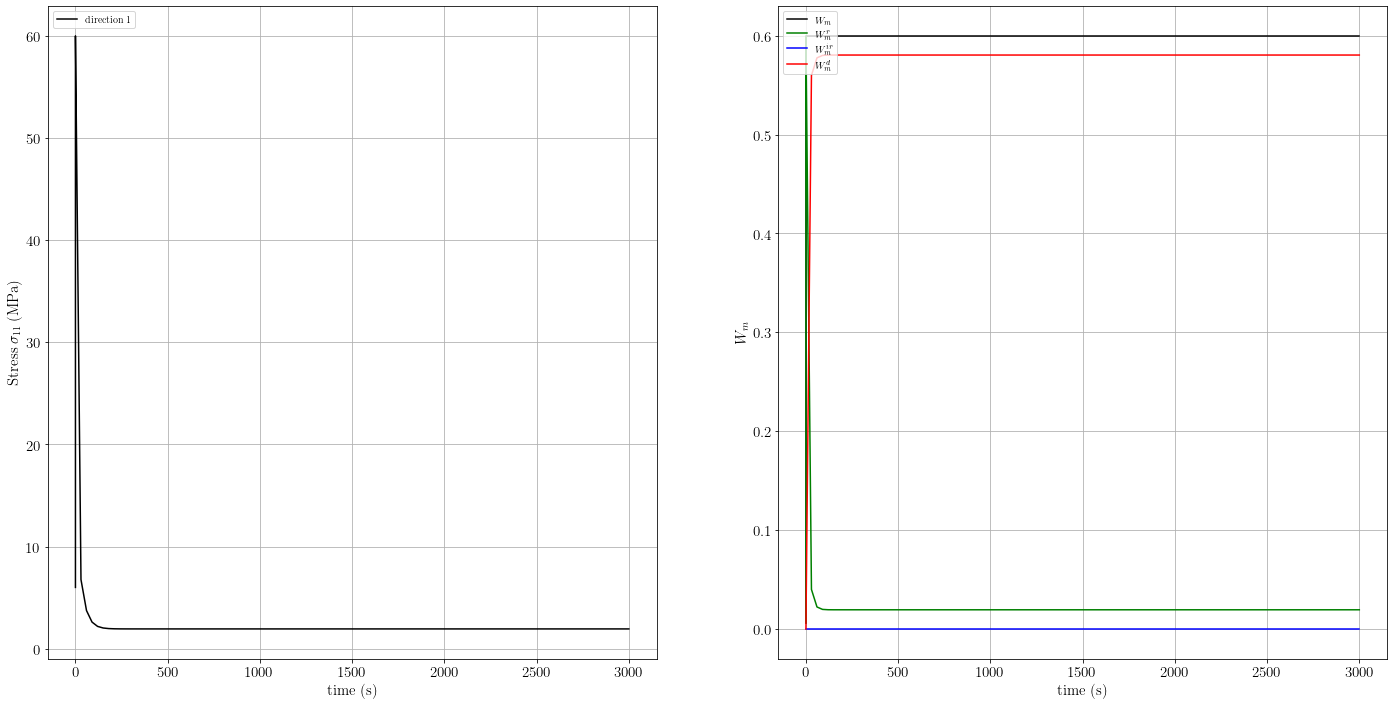

In [26]:
#prepare the load
fig = plt.figure()
outputfile_global = 'results_ZENER_global-0.txt'
pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure output size
path = dir + '/results/'
P_global = path + outputfile_global

#Get the data
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(P_global, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
time, T, Q, r = np.loadtxt(P_global, usecols=(4,5,6,7), unpack=True)
Wm, Wm_r, Wm_ir, Wm_d = np.loadtxt(P_global, usecols=(20,21,22,23), unpack=True)

#Plot the results
ax = fig.add_subplot(1, 2, 1)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'time (s)', size = 15)
plt.ylabel(r'Stress $\sigma_{11}$\,(MPa)', size = 15)
plt.plot(time,s11, c='black', label='direction 1')
plt.legend(loc=2)

ax = fig.add_subplot(1, 2, 2)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (s)', size = 15)
plt.ylabel(r'$W_m$',size = 15)
plt.plot(time,Wm, c='black', label=r'$W_m$')
plt.plot(time,Wm_r, c='green', label=r'$W_m^r$')
plt.plot(time,Wm_ir, c='blue', label=r'$W_m^{ir}$')
plt.plot(time,Wm_d, c='red', label=r'$W_m^d$')
plt.legend(loc=2)

plt.show()